In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df_train=pd.read_csv("C:\\Pandasdata\\DT_files\\agri_train.csv")

In [3]:
df_train.head()

,ID,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season,Crop_Damage
0,F00000001,188,1,0,1,0,0.0,0,1,0
1,F00000003,209,1,0,1,0,0.0,0,2,1
2,F00000004,257,1,0,1,0,0.0,0,2,1
3,F00000005,257,1,1,1,0,0.0,0,2,1
4,F00000006,342,1,0,1,0,0.0,0,2,1


In [4]:
df_train.isnull().sum()

ID                           0
Estimated_Insects_Count      0
Crop_Type                    0
Soil_Type                    0
Pesticide_Use_Category       0
Number_Doses_Week            0
Number_Weeks_Used          442
Number_Weeks_Quit            0
Season                       0
Crop_Damage                  0
dtype: int64

In [5]:
df_train['Number_Weeks_Used'].mean()

28.89102718306471

In [6]:
df_train['Number_Weeks_Used'][0:25]=0

In [7]:
df_train['Number_Weeks_Used']=df_train['Number_Weeks_Used'].fillna(28)

In [8]:
df_test=pd.read_csv("C:\\Pandasdata\\DT_files\\agri_test.csv")

In [9]:
df_test.head()

,ID,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season
0,F00000002,188,1,1,1,0,NaN,0,2
1,F00000007,410,1,1,1,0,0.0,0,2
2,F00000011,626,1,0,1,0,0.0,0,2
3,F00000013,731,1,0,1,0,0.0,0,2
4,F00000014,789,0,0,1,0,0.0,0,1


In [10]:
df_test.isnull().sum()

ID                           0
Estimated_Insects_Count      0
Crop_Type                    0
Soil_Type                    0
Pesticide_Use_Category       0
Number_Doses_Week            0
Number_Weeks_Used          119
Number_Weeks_Quit            0
Season                       0
dtype: int64

In [11]:
df_test['Number_Weeks_Used'].mean()

29.033333333333335

In [12]:
df_train['Number_Weeks_Used'] = df_train['Number_Weeks_Used'].fillna(df_train.groupby('Pesticide_Use_Category')['Number_Weeks_Used'].transform('median'))
df_test['Number_Weeks_Used'] = df_test['Number_Weeks_Used'].fillna(df_test.groupby('Pesticide_Use_Category')['Number_Weeks_Used'].transform('median'))


In [13]:
df_train['Number_Weeks_Used']

0        0.0
1        0.0
2        0.0
3        0.0
4        0.0
        ... 
4594    28.0
4595    47.0
4596     7.0
4597    20.0
4598    33.0
Name: Number_Weeks_Used, Length: 4599, dtype: float64

In [14]:
df_train.isnull().sum()

ID                         0
Estimated_Insects_Count    0
Crop_Type                  0
Soil_Type                  0
Pesticide_Use_Category     0
Number_Doses_Week          0
Number_Weeks_Used          0
Number_Weeks_Quit          0
Season                     0
Crop_Damage                0
dtype: int64

In [15]:
df=pd.concat([df_train,df_test])

In [16]:
df

,ID,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season,Crop_Damage
0,F00000001,188,1,0,1,0,0.0,0,1,0.0
1,F00000003,209,1,0,1,0,0.0,0,2,1.0
2,F00000004,257,1,0,1,0,0.0,0,2,1.0
3,F00000005,257,1,1,1,0,0.0,0,2,1.0
4,F00000006,342,1,0,1,0,0.0,0,2,1.0
...,...,...,...,...,...,...,...,...,...,...
1194,F00003133,1132,0,1,2,40,34.0,7,3,NaN
1195,F00003135,1132,0,1,2,40,25.0,3,1,NaN
1196,F00003138,1132,0,1,2,20,13.0,23,1,NaN
1197,F00003149,1212,0,1,2,10,35.0,5,1,NaN


In [17]:
df_train.shape

(4599, 10)

In [18]:
df_test.shape

(1199, 9)

In [19]:
df.drop('ID',axis=1,inplace=True)

In [20]:
df.head()

,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season,Crop_Damage
0,188,1,0,1,0,0.0,0,1,0.0
1,209,1,0,1,0,0.0,0,2,1.0
2,257,1,0,1,0,0.0,0,2,1.0
3,257,1,1,1,0,0.0,0,2,1.0
4,342,1,0,1,0,0.0,0,2,1.0


In [21]:
df.shape

(5798, 9)

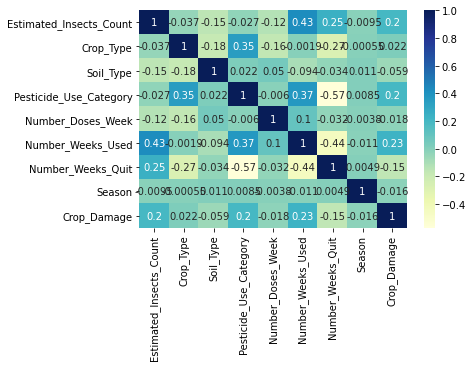

In [22]:
df_corr=df_train.corr()
sns.heatmap(df_corr,cmap='YlGnBu',annot=True)

In [23]:
df["Total_Doses_Used"] = df.Number_Doses_Week*df.Number_Weeks_Used
df_train["Total_Doses_Used"] = df_train.Number_Doses_Week*df_train.Number_Weeks_Used
df_test["Total_Doses_Used"] = df_test.Number_Doses_Week*df_test.Number_Weeks_Used

df["Number_Doses_Monthly"] = df.Total_Doses_Used/30.0
df["Number_Doses_Daily"] = df.Total_Doses_Used/360.0
df["Number_Days_Quit"] = df.Number_Weeks_Quit*7.0

df_train["Number_Doses_Monthly"] = df_train.Total_Doses_Used/30.0
df_train["Number_Doses_Daily"] = df_train.Total_Doses_Used/360.0
df_train["Number_Days_Quit"] = df_train.Number_Weeks_Quit*7.0

df_test["Number_Doses_Monthly"] = df_test.Total_Doses_Used/30.0
df_test["Number_Doses_Daily"] = df_test.Total_Doses_Used/360.0
df_test["Number_Days_Quit"] = df_test.Number_Weeks_Quit*7.0

In [24]:
df.head(40)

,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season,Crop_Damage,Total_Doses_Used,Number_Doses_Monthly,Number_Doses_Daily,Number_Days_Quit
0,188,1,0,1,0,0.0,0,1,0.0,0.0,0.000000,0.000000,0.0
1,209,1,0,1,0,0.0,0,2,1.0,0.0,0.000000,0.000000,0.0
2,257,1,0,1,0,0.0,0,2,1.0,0.0,0.000000,0.000000,0.0
3,257,1,1,1,0,0.0,0,2,1.0,0.0,0.000000,0.000000,0.0
4,342,1,0,1,0,0.0,0,2,1.0,0.0,0.000000,0.000000,0.0
5,448,0,1,1,0,0.0,0,2,1.0,0.0,0.000000,0.000000,0.0
6,448,0,1,1,0,0.0,0,2,1.0,0.0,0.000000,0.000000,0.0
7,577,1,0,1,0,0.0,0,1,2.0,0.0,0.000000,0.000000,0.0
8,731,0,0,1,0,0.0,0,2,0.0,0.0,0.000000,0.000000,0.0
9,1132,1,0,1,0,0.0,0,1,2.0,0.0,0.000000,0.000000,0.0


In [25]:
df.describe()

,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season,Crop_Damage,Total_Doses_Used,Number_Doses_Monthly,Number_Doses_Daily,Number_Days_Quit
count,5798.000000,5798.000000,5798.000000,5798.000000,5798.000000,5798.000000,5798.000000,5798.000000,4599.000000,5798.000000,5798.000000,5798.000000,5798.000000
mean,1347.643153,0.218524,0.472232,2.304243,26.493618,28.813211,8.760262,1.891687,0.194390,783.958261,26.131942,2.177662,61.321835
std,821.330403,0.413280,0.499271,0.484594,15.655508,12.075439,9.582781,0.692997,0.454597,584.710216,19.490341,1.624195,67.079470
min,150.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,731.000000,0.000000,0.000000,2.000000,15.000000,20.000000,0.000000,1.000000,0.000000,360.000000,12.000000,1.000000,0.000000
50%,1132.000000,0.000000,0.000000,2.000000,20.000000,28.000000,6.000000,2.000000,0.000000,640.000000,21.333333,1.777778,42.000000
75%,1786.000000,0.000000,1.000000,3.000000,40.000000,36.000000,15.000000,2.000000,0.000000,1080.000000,36.000000,3.000000,105.000000
max,4097.000000,1.000000,1.000000,3.000000,95.000000,66.000000,47.000000,3.000000,2.000000,4950.000000,165.000000,13.750000,329.000000


In [26]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score,f1_score

In [27]:
df_train.head()

,ID,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season,Crop_Damage,Total_Doses_Used,Number_Doses_Monthly,Number_Doses_Daily,Number_Days_Quit
0,F00000001,188,1,0,1,0,0.0,0,1,0,0.0,0.0,0.0,0.0
1,F00000003,209,1,0,1,0,0.0,0,2,1,0.0,0.0,0.0,0.0
2,F00000004,257,1,0,1,0,0.0,0,2,1,0.0,0.0,0.0,0.0
3,F00000005,257,1,1,1,0,0.0,0,2,1,0.0,0.0,0.0,0.0
4,F00000006,342,1,0,1,0,0.0,0,2,1,0.0,0.0,0.0,0.0


In [28]:
x=df_train.drop('Crop_Damage',axis=1)
y=df_train['Crop_Damage']

In [29]:
x.drop('ID',axis=1,inplace=True)
#x.drop('Number_Weeks_Quit',axis=1,inplace=True)

In [30]:
ss=StandardScaler()
x=ss.fit_transform(x)

In [31]:
print(x.shape)
print(y.shape)

(4599, 12)
(4599,)


In [32]:
x_train, x_test, y_train, y_test = train_test_split(x, y,random_state = 42,test_size=0.33)
dtc=DecisionTreeClassifier()
dtc.fit(x_train,y_train)
y_pred=dtc.predict(x_test)
print('Accuracy Score = ', accuracy_score(y_test,y_pred))

Accuracy Score =  0.7661396574440053


In [33]:
f1_score(y_test,y_pred,average='micro')

0.7661396574440053

In [34]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier()

param_grid = [{'max_depth': [ 4, 6, 8, 10, 12, 16],
               'min_samples_split': [10, 8, 6, 4, 2],  
             }]

grid_search = GridSearchCV(clf, param_grid, cv=3, n_jobs=-1, scoring='accuracy')
grid_search.fit(x,y)
final_model = grid_search.best_estimator_

In [35]:
final_model

DecisionTreeClassifier(max_depth=4, min_samples_split=4)

In [36]:
dtc=DecisionTreeClassifier(max_depth=4,min_samples_split=10)
dtc.fit(x_train,y_train)
y_pred=dtc.predict(x_test)
print('Accuracy Score = ', accuracy_score(y_test,y_pred))

Accuracy Score =  0.83399209486166


In [37]:
f1_score(y_test,y_pred,average='micro')

0.83399209486166

In [38]:
pred_test=pd.Series(y_pred)

In [39]:
pred_test

0       0
1       1
2       0
3       0
4       0
       ..
1513    0
1514    0
1515    0
1516    0
1517    0
Length: 1518, dtype: int64

In [40]:
df_test.head()

,ID,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season,Total_Doses_Used,Number_Doses_Monthly,Number_Doses_Daily,Number_Days_Quit
0,F00000002,188,1,1,1,0,0.0,0,2,0.0,0.0,0.0,0.0
1,F00000007,410,1,1,1,0,0.0,0,2,0.0,0.0,0.0,0.0
2,F00000011,626,1,0,1,0,0.0,0,2,0.0,0.0,0.0,0.0
3,F00000013,731,1,0,1,0,0.0,0,2,0.0,0.0,0.0,0.0
4,F00000014,789,0,0,1,0,0.0,0,1,0.0,0.0,0.0,0.0


In [44]:
df_test.drop('ID',axis=1,inplace=True)

In [45]:
df_test.head()

,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season,Total_Doses_Used,Number_Doses_Monthly,Number_Doses_Daily,Number_Days_Quit
0,188,1,1,1,0,0.0,0,2,0.0,0.0,0.0,0.0
1,410,1,1,1,0,0.0,0,2,0.0,0.0,0.0,0.0
2,626,1,0,1,0,0.0,0,2,0.0,0.0,0.0,0.0
3,731,1,0,1,0,0.0,0,2,0.0,0.0,0.0,0.0
4,789,0,0,1,0,0.0,0,1,0.0,0.0,0.0,0.0


In [46]:
df_test.shape

(1199, 12)

In [47]:
pred_test.shape

(1518,)

In [49]:
x_test1=ss.fit_transform(df_test)

In [50]:
Y_PRED= y_pred=dtc.predict(x_test1)

In [51]:
Y_PRED

array([1, 1, 1, ..., 0, 0, 0], dtype=int64)

In [52]:
Pred_Test=pd.Series(Y_PRED)

In [54]:
Pred_Test.unique()

array([1, 2, 0], dtype=int64)

In [55]:
df['Crop_Damage']=df['Crop_Damage'].fillna(Pred_Test)

In [57]:
df.shape

(5798, 13)

In [58]:
df_train.shape

(4599, 14)

In [59]:
df.isnull().sum()

Estimated_Insects_Count    0
Crop_Type                  0
Soil_Type                  0
Pesticide_Use_Category     0
Number_Doses_Week          0
Number_Weeks_Used          0
Number_Weeks_Quit          0
Season                     0
Crop_Damage                0
Total_Doses_Used           0
Number_Doses_Monthly       0
Number_Doses_Daily         0
Number_Days_Quit           0
dtype: int64

In [60]:
# Saving the model
import joblib
joblib.dump(dtc,'Agriculture_DTC.pkl')

['Agriculture_DTC.pkl']